# Helpdesk log of an Italian company

### Table of Contents

* [Data Extraction Checklist](#DataExtractionChecklist)
* [Data Quality Check](#DataQualityCheck)
* [Data Transformation](#DataTransformation)
* [Process Discovery](#ProcessDiscovery)
    * [Variant Analysis](#VariantAnalysis)
    * [Process Flow Graph](#ProcessFlowGraph)
    * [Transition Matrix](#TransitionMatrix)
* [Timing Analysis](#TimingAnalysis)
    * [Case Duration](#CaseDuration)
    * [Event Duration](#EventDuration)
* [Open Orders](#OpenOrders)

## Data Extraction Checklist<a class="anchor" id="DataExtractionChecklist"></a>

### 1. Which Process?

##### The event log concerns the ticketing management process of the Help desk of an Italian software company. The dataset was gotten from [here](https://data.4tu.nl/articles/dataset/Dataset_belonging_to_the_help_desk_log_of_an_Italian_Company/12675977)

### 2. Questions about Process?
The question we are to answer relates to conformance. 


### 3. Which IT System?
The system was not stated

### 4. Case ID?
The <i>Case ID</i> to be used is the case column.

### 5. Activities
The ACTIVITY_EN column contains 14 activities which were performed over the period. These activities include:

1. Take in charge ticket
2. Resolve ticket
3. Assign seriousness
4. Closed
5. Wait
6. Require upgrade
7. Insert ticket
8. Create SW anomaly
9. Resolve SW anomaly
10. Schedule intervention
11. VERIFIED
12. RESOLVED
13. INVALID
14. DUPLICATE

### 6. Timestamps
There Complete Timestamp column was used as the timestamp.

### 7. Other attributes
The dataset contains other attributes shown below:
* Variant: case variant
* Variant index: case variant in integer format
* seriousness: a seriousness level for the ticket
* customer: name of the customer
* product: name of the product
* responsible_section: name of the responsible section
* seriousness_2: a sub-seriousness level
* service_level: level of the service
* service_type: type of the service
* support_section: name of the support section
* workgroup: name of the workgroup

### 8. Selection method
To get a thorough understanding of the process, it is important to look at the finished cases. From the review of the dataset, it contains 4,580 cases and there were initially 6 different start/end activities. It was assumed that this was due to the way the data was extracted from the system. The dataset was extracted for events from 13th January 2010 to 13th January 2014, without considering if these cases starts or ends on these dates.

The analysis carried out indicated that there are two posible start events (Assign seriousness and Insert ticket) and one end event (Closed). The eventlog was then filtered for cases which meets this criteria.


### 9. Timeframe
The dataset contains cases spaning 4 years from 13th January 2010 to 13th January 2014

In [1]:
import pandas as pd
import graphviz

In [2]:
df = pd.read_csv('finale.csv')
df

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup
0,Case 1,Assign seriousness,Value 1,2012/10/09 14:50:17.000,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
1,Case 1,Take in charge ticket,Value 1,2012/10/09 14:51:01.000,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
2,Case 1,Take in charge ticket,Value 2,2012/10/12 15:02:56.000,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
3,Case 1,Resolve ticket,Value 1,2012/10/25 11:54:26.000,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
4,Case 1,Closed,Value 3,2012/11/09 12:54:39.000,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21343,Case 4579,Closed,Value 5,2010/09/02 10:11:00.000,Variant 1,1,Variant 1,Value 1,Value 71,Value 3,Value 1,Value 1,Value 3,Value 1,Value 1,Value 1
21344,Case 4580,Take in charge ticket,Value 6,2012/01/03 09:33:43.000,Variant 18,18,Variant 18,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 1
21345,Case 4580,Wait,Value 6,2012/01/10 15:30:11.000,Variant 18,18,Variant 18,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 1
21346,Case 4580,Resolve ticket,Value 6,2012/01/10 17:07:40.000,Variant 18,18,Variant 18,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Case ID              21348 non-null  object
 1   Activity             21348 non-null  object
 2   Resource             21348 non-null  object
 3   Complete Timestamp   21348 non-null  object
 4   Variant              21348 non-null  object
 5   Variant index        21348 non-null  int64 
 6   Variant.1            21348 non-null  object
 7   seriousness          21348 non-null  object
 8   customer             21348 non-null  object
 9   product              21348 non-null  object
 10  responsible_section  21348 non-null  object
 11  seriousness_2        21348 non-null  object
 12  service_level        21348 non-null  object
 13  service_type         21348 non-null  object
 14  support_section      21348 non-null  object
 15  workgroup            21348 non-null  object
dtypes: i

In [4]:
df.isnull().sum()

Case ID                0
Activity               0
Resource               0
Complete Timestamp     0
Variant                0
Variant index          0
Variant.1              0
seriousness            0
customer               0
product                0
responsible_section    0
seriousness_2          0
service_level          0
service_type           0
support_section        0
workgroup              0
dtype: int64

## Data Quality Check <a class="anchor" id="DataQualityCheck"></a>

#### 1. Any errors during import?
After importing the event log, it was noticed that the startTime is not recognised as a timestamp in python.

#### 2. Empty or missing values in the dataset?

There were NO empty and missing values in the dataset.

#### 3.  Disclaimer:
No process owner was contacted to gain further understanding of other columns

## Data Transformation<a class="anchor" id="DataTransformation"></a>

### Correcting the timestamp format

In [5]:
df['Complete Timestamp'] = pd.to_datetime(df['Complete Timestamp'])

In [6]:
df.head()

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup
0,Case 1,Assign seriousness,Value 1,2012-10-09 14:50:17,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
1,Case 1,Take in charge ticket,Value 1,2012-10-09 14:51:01,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
2,Case 1,Take in charge ticket,Value 2,2012-10-12 15:02:56,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
3,Case 1,Resolve ticket,Value 1,2012-10-25 11:54:26,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
4,Case 1,Closed,Value 3,2012-11-09 12:54:39,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1


In [7]:
df['Complete Timestamp'].min()

Timestamp('2010-01-13 08:40:25')

In [8]:
df['Complete Timestamp'].max()

Timestamp('2014-01-03 13:20:58')

In [9]:
df['Activity'].value_counts()

Take in charge ticket    5060
Resolve ticket           4983
Assign seriousness       4938
Closed                   4574
Wait                     1463
Require upgrade           119
Insert ticket             118
Create SW anomaly          67
Resolve SW anomaly         13
Schedule intervention       5
VERIFIED                    3
RESOLVED                    2
INVALID                     2
DUPLICATE                   1
Name: Activity, dtype: int64

In [10]:
df.columns

Index(['Case ID', 'Activity', 'Resource', 'Complete Timestamp', 'Variant',
       'Variant index', 'Variant.1', 'seriousness', 'customer', 'product',
       'responsible_section', 'seriousness_2', 'service_level', 'service_type',
       'support_section', 'workgroup'],
      dtype='object')

### Filtering for completed cases


In [11]:
df_2 = df.copy()
df_2

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup
0,Case 1,Assign seriousness,Value 1,2012-10-09 14:50:17,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
1,Case 1,Take in charge ticket,Value 1,2012-10-09 14:51:01,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
2,Case 1,Take in charge ticket,Value 2,2012-10-12 15:02:56,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
3,Case 1,Resolve ticket,Value 1,2012-10-25 11:54:26,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
4,Case 1,Closed,Value 3,2012-11-09 12:54:39,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21343,Case 4579,Closed,Value 5,2010-09-02 10:11:00,Variant 1,1,Variant 1,Value 1,Value 71,Value 3,Value 1,Value 1,Value 3,Value 1,Value 1,Value 1
21344,Case 4580,Take in charge ticket,Value 6,2012-01-03 09:33:43,Variant 18,18,Variant 18,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 1
21345,Case 4580,Wait,Value 6,2012-01-10 15:30:11,Variant 18,18,Variant 18,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 1
21346,Case 4580,Resolve ticket,Value 6,2012-01-10 17:07:40,Variant 18,18,Variant 18,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 1


In [12]:
def func(x):
    # Get the last valid index (last activity per case)
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]

def activity_list(df, case_id, activities):
    # Get the last and first activity for each case
    activities_list = df.copy()
    activities_list['Count'] = activities_list.groupby(case_id).cumcount()+1
    activities_list = activities_list.pivot(index=case_id, columns='Count', values=activities)

    activities_list['Last Activity'] = activities_list.apply(func, axis=1)
    activities_list['First Activity'] = activities_list[1]
    return activities_list

#### Dataframe filtering

* The eventlog was filtered for cases begining with any of the two events:
    1. Assign seriousness
    2. Insert ticket
* The eventlog was then filtered for cases ending with Closed

After this, we were left with 4,479 cases.

In [13]:
df_xtract = df_2.copy()
df_xtract = df_xtract.sort_values(by=['Case ID','Complete Timestamp'],ascending=True).reset_index(drop=True)
df_xtract = activity_list(df_xtract,'Case ID','Activity')
df_xtract = df_xtract[(df_xtract['First Activity'] == 'Assign seriousness')
                      | (df_xtract['First Activity'] == 'Insert ticket')]
df_xtract

Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Last Activity,First Activity
Case ID,,,,,,,,,,,,,,,,,
Case 1,Assign seriousness,Take in charge ticket,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 10,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 100,Assign seriousness,Take in charge ticket,Require upgrade,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 1000,Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 1001,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case 995,Assign seriousness,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 996,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 997,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness


In [14]:
df_xtract_2 = df_xtract[(df_xtract['Last Activity'] == 'Closed')]
df_xtract_2

Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Last Activity,First Activity
Case ID,,,,,,,,,,,,,,,,,
Case 1,Assign seriousness,Take in charge ticket,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 10,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 100,Assign seriousness,Take in charge ticket,Require upgrade,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 1000,Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 1001,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case 995,Assign seriousness,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 996,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness
Case 997,Assign seriousness,Take in charge ticket,Resolve ticket,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,Assign seriousness


In [15]:
df_xtract_2 = df_xtract_2.reset_index()
df_xtract_2 = df_xtract_2[['Case ID']]
df_xtract_2

Count,Case ID
0,Case 1
1,Case 10
2,Case 100
3,Case 1000
4,Case 1001
...,...
4474,Case 995
4475,Case 996
4476,Case 997
4477,Case 998


In [16]:
df_final = df_xtract_2.merge(df_2, on='Case ID')
df_final

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup
0,Case 1,Assign seriousness,Value 1,2012-10-09 14:50:17,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
1,Case 1,Take in charge ticket,Value 1,2012-10-09 14:51:01,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
2,Case 1,Take in charge ticket,Value 2,2012-10-12 15:02:56,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
3,Case 1,Resolve ticket,Value 1,2012-10-25 11:54:26,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
4,Case 1,Closed,Value 3,2012-11-09 12:54:39,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,Case 998,Closed,Value 3,2013-01-04 16:51:50,Variant 2,2,Variant 2,Value 1,Value 62,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,Value 1
20933,Case 999,Assign seriousness,Value 1,2013-02-12 16:06:37,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4
20934,Case 999,Take in charge ticket,Value 12,2013-02-25 11:37:20,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4
20935,Case 999,Resolve ticket,Value 12,2013-03-14 16:24:30,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4


In [17]:
df_final['Activity'].value_counts()

Take in charge ticket    4949
Assign seriousness       4918
Resolve ticket           4881
Closed                   4494
Wait                     1402
Insert ticket             114
Require upgrade           104
Create SW anomaly          57
Resolve SW anomaly          8
Schedule intervention       5
VERIFIED                    2
RESOLVED                    1
INVALID                     1
DUPLICATE                   1
Name: Activity, dtype: int64

In [18]:
df_final = df_final.sort_values(by=['Case ID','Complete Timestamp'],ascending=True).reset_index(drop=True)
# df_final = df_final[['Case ID','Activity','Complete Timestamp']]
df_final['Duration'] = df_final.groupby(['Case ID'])['Complete Timestamp'].diff().dt.days
df_final['Duration'] = df_final['Duration'].fillna(0)
df_final['Event_ID'] = df_final.groupby(['Case ID']).cumcount()+1
df_final

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup,Duration,Event_ID
0,Case 1,Assign seriousness,Value 1,2012-10-09 14:50:17,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,0.0,1
1,Case 1,Take in charge ticket,Value 1,2012-10-09 14:51:01,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,0.0,2
2,Case 1,Take in charge ticket,Value 2,2012-10-12 15:02:56,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,3.0,3
3,Case 1,Resolve ticket,Value 1,2012-10-25 11:54:26,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,12.0,4
4,Case 1,Closed,Value 3,2012-11-09 12:54:39,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,15.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,Case 998,Closed,Value 3,2013-01-04 16:51:50,Variant 2,2,Variant 2,Value 1,Value 62,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,Value 1,15.0,5
20933,Case 999,Assign seriousness,Value 1,2013-02-12 16:06:37,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4,0.0,1
20934,Case 999,Take in charge ticket,Value 12,2013-02-25 11:37:20,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4,12.0,2
20935,Case 999,Resolve ticket,Value 12,2013-03-14 16:24:30,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4,17.0,3


In [19]:
# df_final.to_csv('Helpdesk_log.csv', index=False)

# Process Discovery<a class="anchor" id="ProcessDiscovery"></a>

In [20]:
# Define the following variables
caseid = 'Case ID'
activity = 'Activity'
timestamp = 'Complete Timestamp'
customer = 'customer'

### Variant analysis<a class="anchor" id="VariantAnalysis"></a>

Here, we look at the various traces in each case and identify similar traces. These individual traces are also called variants. The purpose of this is to see how many cases follow the same exact process. From our analysis, it can be seen that there are 193 variants. The first variant accounts for approximately 53% of all cases.

The first five variants accounts for 3,523 cases which accounts for approximately 79% of all cases. 

Out of 193 variants, 111 variants occured once, 22 variants occured twice, 11 variants occures thrice and 10 variants occured 4 times. With the high number of variants occuring once, this calls for a better standardisation of the process. It is important to note that the numerous variants doesn't mean that these processes are entirely wrong. It just shows that there is no standard process that should be followed

Further analysis will be done on Microsoft PowerBI.

In [21]:
# Variants
def variant_analysis(df,case_id, activities):
    # Get the process variants
    variants = df.copy()
    variants['Count'] = variants.groupby(case_id).cumcount()+1
    variants = variants.pivot(index=case_id, columns='Count', values=activities)
    variants_col = variants.columns
    
    # Fill the empty cells (NaN) with 'X'
    variants = variants.fillna('X')
    variants = variants.astype('str')
    
    # Get the trace of each case by joining all the columns together, separated by a comma (,) and replace ',X' with nothing to delete the ',X'
    variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
    variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
    
    # Group the similar variants and get the count
    variants_sum = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
    variants_sum = variants_sum.sort_values(by=1, ascending=False).reset_index()
    del variants_sum['index']
    variants_sum = variants_sum.reset_index()
    variants_sum['index'] = variants_sum['index']+1
    variants_sum = variants_sum.rename(columns={'index':'Variants',1:'No of occurance'})
    return variants_sum

In [22]:
variants = variant_analysis(df_final, caseid, activity)
variants

Count,Variants,Trace,No of occurance
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366
1,2,"Assign seriousness,Take in charge ticket,Wait,...",552
2,3,"Assign seriousness,Take in charge ticket,Wait,...",228
3,4,"Assign seriousness,Assign seriousness,Take in ...",213
4,5,"Assign seriousness,Resolve ticket,Closed",164
...,...,...,...
188,189,"Assign seriousness,Take in charge ticket,Resol...",1
189,190,"Assign seriousness,Take in charge ticket,Resol...",1
190,191,"Assign seriousness,Take in charge ticket,Resol...",1
191,192,"Assign seriousness,Take in charge ticket,Resol...",1


In [23]:
list(variants['Trace'][:5])

['Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed',
 'Assign seriousness,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed',
 'Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
 'Assign seriousness,Resolve ticket,Closed']

In [24]:
variants['No of occurance'].value_counts()

1       111
2        22
3        11
4        10
5         4
7         3
8         3
6         3
21        2
18        1
9         1
10        1
11        1
14        1
15        1
16        1
17        1
2366      1
552       1
20        1
27        1
28        1
35        1
36        1
40        1
48        1
62        1
69        1
109       1
164       1
213       1
228       1
19        1
Name: No of occurance, dtype: int64

In [25]:
def variant_analysis_df(df,case_id, activities):
    # Get the process variants
    variants_df = df.copy()
    variants_df['Count'] = variants_df.groupby(case_id).cumcount()+1
    variants_df = variants_df.pivot(index=case_id, columns='Count', values=activities)
    variants_df_col = variants_df.columns
    
    # Fill the empty cells (NaN) with 'X'
    variants_df = variants_df.fillna('X')
    variants_df = variants_df.astype('str')
    
    # Get the trace of each case by joining all the columns together, separated by a comma (,) and replace ',X' with nothing to delete the ',X'
    variants_df['Trace'] = variants_df.apply(lambda x: ','.join(x),axis=1)
    variants_df['Trace'] = variants_df['Trace'].apply(lambda x: x.replace(',X',''))
    
    # Merge with the variants_analysis df
    variants = variant_analysis(df, case_id, activities)
    variants_df = variants.merge(pd.DataFrame(variants_df).reset_index(), on='Trace')
    variants_df = variants_df.drop(variants_df_col, axis=1)
    return variants_df

In [26]:
distinct_df = variant_analysis_df(df_final, caseid, activity)
distinct_df

Count,Variants,Trace,No of occurance,Case ID
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 10
1,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1001
2,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1002
3,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1003
4,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1004
...,...,...,...,...
4474,189,"Assign seriousness,Take in charge ticket,Resol...",1,Case 4225
4475,190,"Assign seriousness,Take in charge ticket,Resol...",1,Case 895
4476,191,"Assign seriousness,Take in charge ticket,Resol...",1,Case 2239
4477,192,"Assign seriousness,Take in charge ticket,Resol...",1,Case 37


### Process Flow Graph<a class="anchor" id="ProcessFlowGraph"></a>

This process graph aims to show how the cases flow from one activity to another at a glance. It also shows the amount for each transitions.
Steps:
* Identify the start events using the start_activities function
* Identify the various end events using the end_activities function
* Using the process_detais function, generate the process flow from one event to another and count the number of times this occurs. This will be used to draw the process graph and the labels of the graph will show the counts.
* Using the graph_count function, get the total number of times a particular activity occurs in the extracted event log. This is included as a label in the node.
* Draw the process flow graph

The gaph might not be very visible here. It will be further analysed and better visualised in Microsoft PowerBI.

In [27]:
# Start Activities
def start_activities(df, case_id, activities):
    activities_list = activity_list(df, case_id, activities)
    start_act = activities_list.groupby(['First Activity']).size()
    start_act = start_act.to_frame(name='Count').reset_index()
    start_act['Start'] = 'Start'
    start_act = start_act[['Start','First Activity','Count']]
    start_act = start_act.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return start_act

In [28]:
# End Activities
def end_activities(df, case_id, activities):
    activities_list = activity_list(df, case_id, activities)
    end_act = activities_list.groupby(['Last Activity']).size()
    end_act = end_act.to_frame(name='Count').reset_index()
    end_act['End'] = 'End'
    end_act = end_act[['End','Last Activity','Count']]
    end_act = end_act.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return end_act

In [29]:
# Process details
def process_details(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    df_1 = df_1[[case_id, activities, activities+'_2']]
    df_1 = df_1.groupby([activities,activities+'_2'], sort=False).size()
    df_1 = df_1.to_frame(name='Count').reset_index()
    return df_1

In [30]:
# Graph count
def graph_count(df, activities):
    graph_count = df.copy()
    graph_count = graph_count[activities].value_counts().to_frame().reset_index().rename(columns={'index':activities, activities:'Count'})
    return graph_count

In [31]:
start_act = start_activities(df_final, caseid, activity)
start_act

,Start,First Activity,Count
0,Start,Assign seriousness,4365
1,Start,Insert ticket,114


In [32]:
end_act = end_activities(df_final, caseid, activity)
end_act

,End,Last Activity,Count
0,End,Closed,4479


In [33]:
pro_det = process_details(df_final, caseid, timestamp, activity)
pro_det

,Activity,Activity_2,Count
0,Assign seriousness,Take in charge ticket,4142
1,Take in charge ticket,Take in charge ticket,96
2,Take in charge ticket,Resolve ticket,3510
3,Resolve ticket,Closed,4479
4,Take in charge ticket,Require upgrade,68
5,Require upgrade,Resolve ticket,76
6,Assign seriousness,Assign seriousness,438
7,Take in charge ticket,Wait,1221
8,Wait,Resolve ticket,744
9,Insert ticket,Assign seriousness,111


In [34]:
gra_coun = graph_count(df_final, activity)
gra_coun

,Activity,Count
0,Take in charge ticket,4949
1,Assign seriousness,4918
2,Resolve ticket,4881
3,Closed,4494
4,Wait,1402
5,Insert ticket,114
6,Require upgrade,104
7,Create SW anomaly,57
8,Resolve SW anomaly,8
9,Schedule intervention,5


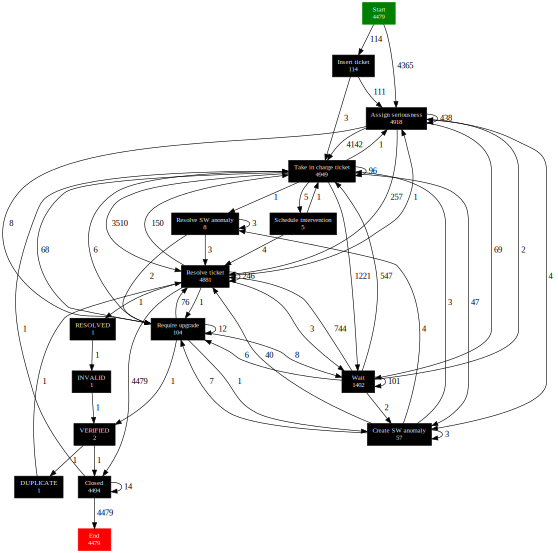

In [35]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

# max_node = 5
# max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Count'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Count'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, count = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in pro_det.iterrows():
    g.node(row[activity],label=row[activity] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity]]['Count'].sum()))
    g.node(row[activity+'_2'],label=row[activity+'_2'] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity+'_2']]['Count'].sum()))

for index, row in pro_det.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    g.edge(str(row[activity]), str(row[activity+'_2']), label= "  " + count)
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(gra_coun[gra_coun[activity] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Count'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, count = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

### Transition Matrix<a class="anchor" id="TransitionMatrix"></a>

The aim of this transition matrix shows how the cases moves from one event to another. The row shows the starting event, while the column shows the preceeding events, while the numbers indicates how many times this was done. For example, <i>Assign seriousness</i> was followed by <i>Take in charge ticket</i> 4,142 times. 

The following were noted:
- <b>Sequence-related issues</b>:
    - <b>Closed to Take in charge ticket </b>: There was a case where after the ticket was closed, it was moved to take in charge ticket. Either all cases should be able to do this, or a new case should be opened for each ticket raised.
    
- <b>Repeated activities</b>: There were several repeated activities. The noteable ones includes:
    - <b>Assign seriousness</b>: This was repeated 438 times. Majority of this repetition was done by the same resource. The repetition did not result in the reassignment of the ticket to another resource. This is either due to lack of training of the users in the system. The system should be redesigned to ensure that the same seriousness is not assigned to a particular case unless it is changing. 
    - <b>Closed</b>: This was repeated 14 times in 14 different orders. This shows that some activities can be repeated.
    - <b>Resolve ticket</b>: This was repeated 246 times. Change scheduled date
    
- <b>Unwanted activities</b>: Looking at the activities and number of occurrence, there are some activities that occured once. These activities were classified as unwanted activities. They include:
    - DUPLICATE
    - INVALID
    - RESOLVED
    - VERIFIED
    
- <b>Connections</b>: The connection column below shows the connections between events i.e., from the preceeding activity to the next activity. From this, there are 52 possible connections.

Further analysis and visualisation is done in Microsoft PowerBI

In [36]:
def process_details_test(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    return df_1

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(process_details_test(df_final, caseid, timestamp, activity).pivot_table(index=activity, columns=activity+'_2', values=caseid, aggfunc='count').fillna(0))

# process_details_test(df_final, '_CASE_KEY', 'EVENTTIME', 'ACTIVITY_EN').pivot_table(index='ACTIVITY_EN', columns='ACTIVITY_EN_2', values='_CASE_KEY',aggfunc='count').fillna(0)

Activity_2,Assign seriousness,Closed,Create SW anomaly,DUPLICATE,INVALID,RESOLVED,Require upgrade,Resolve SW anomaly,Resolve ticket,Schedule intervention,Take in charge ticket,VERIFIED,Wait
Activity,,,,,,,,,,,,,
Assign seriousness,438.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,257.0,0.0,4142.0,0.0,69.0
Closed,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Create SW anomaly,0.0,0.0,3.0,0.0,0.0,0.0,7.0,4.0,40.0,0.0,3.0,0.0,0.0
DUPLICATE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
INVALID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Insert ticket,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
RESOLVED,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Require upgrade,0.0,0.0,1.0,0.0,0.0,0.0,12.0,0.0,76.0,0.0,6.0,1.0,8.0
Resolve SW anomaly,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0


In [38]:
proc_det = process_details_test(df_final, caseid, timestamp, activity)
proc_det

,Case ID,Complete Timestamp,Activity,Case ID_2,Complete Timestamp_2,Activity_2
0,Case 1,2012-10-09 14:50:17,Assign seriousness,Case 1,2012-10-09 14:51:01,Take in charge ticket
1,Case 1,2012-10-09 14:51:01,Take in charge ticket,Case 1,2012-10-12 15:02:56,Take in charge ticket
2,Case 1,2012-10-12 15:02:56,Take in charge ticket,Case 1,2012-10-25 11:54:26,Resolve ticket
3,Case 1,2012-10-25 11:54:26,Resolve ticket,Case 1,2012-11-09 12:54:39,Closed
5,Case 10,2010-02-10 08:50:20,Assign seriousness,Case 10,2010-03-19 08:47:06,Take in charge ticket
...,...,...,...,...,...,...
20930,Case 998,2012-12-04 09:55:27,Wait,Case 998,2012-12-20 16:51:35,Resolve ticket
20931,Case 998,2012-12-20 16:51:35,Resolve ticket,Case 998,2013-01-04 16:51:50,Closed
20933,Case 999,2013-02-12 16:06:37,Assign seriousness,Case 999,2013-02-25 11:37:20,Take in charge ticket
20934,Case 999,2013-02-25 11:37:20,Take in charge ticket,Case 999,2013-03-14 16:24:30,Resolve ticket


In [39]:
proc_det['Connection'] = proc_det[activity] + " --> " + proc_det[activity+'_2']
proc_det

,Case ID,Complete Timestamp,Activity,Case ID_2,Complete Timestamp_2,Activity_2,Connection
0,Case 1,2012-10-09 14:50:17,Assign seriousness,Case 1,2012-10-09 14:51:01,Take in charge ticket,Assign seriousness --> Take in charge ticket
1,Case 1,2012-10-09 14:51:01,Take in charge ticket,Case 1,2012-10-12 15:02:56,Take in charge ticket,Take in charge ticket --> Take in charge ticket
2,Case 1,2012-10-12 15:02:56,Take in charge ticket,Case 1,2012-10-25 11:54:26,Resolve ticket,Take in charge ticket --> Resolve ticket
3,Case 1,2012-10-25 11:54:26,Resolve ticket,Case 1,2012-11-09 12:54:39,Closed,Resolve ticket --> Closed
5,Case 10,2010-02-10 08:50:20,Assign seriousness,Case 10,2010-03-19 08:47:06,Take in charge ticket,Assign seriousness --> Take in charge ticket
...,...,...,...,...,...,...,...
20930,Case 998,2012-12-04 09:55:27,Wait,Case 998,2012-12-20 16:51:35,Resolve ticket,Wait --> Resolve ticket
20931,Case 998,2012-12-20 16:51:35,Resolve ticket,Case 998,2013-01-04 16:51:50,Closed,Resolve ticket --> Closed
20933,Case 999,2013-02-12 16:06:37,Assign seriousness,Case 999,2013-02-25 11:37:20,Take in charge ticket,Assign seriousness --> Take in charge ticket
20934,Case 999,2013-02-25 11:37:20,Take in charge ticket,Case 999,2013-03-14 16:24:30,Resolve ticket,Take in charge ticket --> Resolve ticket


In [40]:
proc_det['Connection'].nunique()

52

In [41]:
# proc_det.to_csv('Process_details.csv', index=False)

## Timing Analysis<a class="anchor" id="TimingAnalysis"></a>

### Case duration<a class="anchor" id="CaseDuration"></a>

.........

In [42]:
def case_duration(df, case_id, dates):
    case_dur = df.copy()
    case_dur['Count'] = case_dur.groupby(case_id).cumcount()+1
    case_dur = case_dur.pivot(index=case_id, columns='Count', values=dates)
    case_dur_col = case_dur.columns
    case_dur['Max'] = case_dur.apply(max, axis=1)
    case_dur['Case_Duration_days'] = (case_dur['Max'] - case_dur[1]).dt.days
    case_dur = case_dur.drop(case_dur_col, axis=1)
    case_dur.reset_index(inplace=True)    
    return case_dur

In [43]:
case_duration(df_final, caseid, timestamp).drop('Max', axis=1)

Count,Case ID,Case_Duration_days
0,Case 1,30
1,Case 10,51
2,Case 100,48
3,Case 1000,44
4,Case 1001,34
...,...,...
4474,Case 995,51
4475,Case 996,36
4476,Case 997,33
4477,Case 998,35


### Event duration<a class="anchor" id="EventDuration"></a>

Here we wanted to see the median days spent on each activity. From the below, Invoice cancellation activity has the highest medium time, followed by credit memo, then debit memo.

In [44]:
df_final.groupby([activity])['Duration'].median().round(0)

Activity
Assign seriousness        0.0
Closed                   30.0
Create SW anomaly         0.0
DUPLICATE                 0.0
INVALID                   0.0
Insert ticket             0.0
RESOLVED                  0.0
Require upgrade           2.0
Resolve SW anomaly        0.0
Resolve ticket            0.0
Schedule intervention     0.0
Take in charge ticket     0.0
VERIFIED                  0.0
Wait                      0.0
Name: Duration, dtype: float64

In [45]:
df_final.groupby([activity])['Duration'].max().round(0)

Activity
Assign seriousness       44.0
Closed                   59.0
Create SW anomaly        28.0
DUPLICATE                 0.0
INVALID                   0.0
Insert ticket             0.0
RESOLVED                  0.0
Require upgrade          42.0
Resolve SW anomaly       21.0
Resolve ticket           50.0
Schedule intervention    11.0
Take in charge ticket    46.0
VERIFIED                  0.0
Wait                     42.0
Name: Duration, dtype: float64

In [46]:
distinct_df = distinct_df.merge(case_duration(df_final,caseid,timestamp).drop('Max', axis=1))
distinct_df

Count,Variants,Trace,No of occurance,Case ID,Case_Duration_days
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 10,51
1,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1001,34
2,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1002,31
3,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1003,42
4,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1004,31
...,...,...,...,...,...
4474,189,"Assign seriousness,Take in charge ticket,Resol...",1,Case 4225,44
4475,190,"Assign seriousness,Take in charge ticket,Resol...",1,Case 895,31
4476,191,"Assign seriousness,Take in charge ticket,Resol...",1,Case 2239,31
4477,192,"Assign seriousness,Take in charge ticket,Resol...",1,Case 37,51


In [47]:
distinct_df = distinct_df.merge(df_final.groupby(caseid).head(1), on=caseid)
distinct_df

,Variants,Trace,No of occurance,Case ID,Case_Duration_days,Activity,Resource,Complete Timestamp,Variant,Variant index,...,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup,Duration,Event_ID
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 10,51,Assign seriousness,Value 2,2010-02-10 08:50:20,Variant 1,1,...,Value 10,Value 3,Value 2,Value 1,Value 3,Value 1,Value 2,Value 3,0.0,1
1,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1001,34,Assign seriousness,Value 4,2013-03-08 17:01:24,Variant 1,1,...,Value 239,Value 2,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1
2,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1002,31,Assign seriousness,Value 19,2010-08-25 10:36:10,Variant 1,1,...,Value 18,Value 3,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1
3,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1003,42,Assign seriousness,Value 8,2010-12-23 11:23:52,Variant 1,1,...,Value 20,Value 1,Value 1,Value 2,Value 2,Value 1,Value 1,Value 1,0.0,1
4,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1004,31,Assign seriousness,Value 1,2011-09-21 07:09:20,Variant 1,1,...,Value 27,Value 3,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,189,"Assign seriousness,Take in charge ticket,Resol...",1,Case 4225,44,Assign seriousness,Value 9,2010-09-24 10:35:03,Variant 217,217,...,Value 259,Value 3,Value 1,Value 2,Value 2,Value 1,Value 1,Value 2,0.0,1
4475,190,"Assign seriousness,Take in charge ticket,Resol...",1,Case 895,31,Assign seriousness,Value 14,2010-11-10 16:32:22,Variant 111,111,...,Value 247,Value 3,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1
4476,191,"Assign seriousness,Take in charge ticket,Resol...",1,Case 2239,31,Assign seriousness,Value 4,2013-01-11 08:44:28,Variant 159,159,...,Value 124,Value 6,Value 1,Value 1,Value 3,Value 1,Value 1,Value 1,0.0,1
4477,192,"Assign seriousness,Take in charge ticket,Resol...",1,Case 37,51,Assign seriousness,Value 8,2011-02-10 11:13:07,Variant 92,92,...,Value 22,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1


In [48]:
first_last = activity_list(df_final,caseid,activity).reset_index()
first_last = first_last[[caseid,'Last Activity','First Activity']]
first_last

Count,Case ID,Last Activity,First Activity
0,Case 1,Closed,Assign seriousness
1,Case 10,Closed,Assign seriousness
2,Case 100,Closed,Assign seriousness
3,Case 1000,Closed,Assign seriousness
4,Case 1001,Closed,Assign seriousness
...,...,...,...
4474,Case 995,Closed,Assign seriousness
4475,Case 996,Closed,Assign seriousness
4476,Case 997,Closed,Assign seriousness
4477,Case 998,Closed,Assign seriousness


In [49]:
distinct_df = distinct_df.merge(first_last, on=caseid)
distinct_df

,Variants,Trace,No of occurance,Case ID,Case_Duration_days,Activity,Resource,Complete Timestamp,Variant,Variant index,...,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup,Duration,Event_ID,Last Activity,First Activity
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 10,51,Assign seriousness,Value 2,2010-02-10 08:50:20,Variant 1,1,...,Value 2,Value 1,Value 3,Value 1,Value 2,Value 3,0.0,1,Closed,Assign seriousness
1,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1001,34,Assign seriousness,Value 4,2013-03-08 17:01:24,Variant 1,1,...,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness
2,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1002,31,Assign seriousness,Value 19,2010-08-25 10:36:10,Variant 1,1,...,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness
3,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1003,42,Assign seriousness,Value 8,2010-12-23 11:23:52,Variant 1,1,...,Value 1,Value 2,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness
4,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1004,31,Assign seriousness,Value 1,2011-09-21 07:09:20,Variant 1,1,...,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,189,"Assign seriousness,Take in charge ticket,Resol...",1,Case 4225,44,Assign seriousness,Value 9,2010-09-24 10:35:03,Variant 217,217,...,Value 1,Value 2,Value 2,Value 1,Value 1,Value 2,0.0,1,Closed,Assign seriousness
4475,190,"Assign seriousness,Take in charge ticket,Resol...",1,Case 895,31,Assign seriousness,Value 14,2010-11-10 16:32:22,Variant 111,111,...,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness
4476,191,"Assign seriousness,Take in charge ticket,Resol...",1,Case 2239,31,Assign seriousness,Value 4,2013-01-11 08:44:28,Variant 159,159,...,Value 1,Value 1,Value 3,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness
4477,192,"Assign seriousness,Take in charge ticket,Resol...",1,Case 37,51,Assign seriousness,Value 8,2011-02-10 11:13:07,Variant 92,92,...,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness


In [50]:
distinct_df_extract_2 = df_final.groupby(caseid).tail(1)
distinct_df_extract_2 = distinct_df_extract_2[[caseid,timestamp]]
distinct_df_extract_2.rename(columns = {timestamp:'EndDate'}, inplace = True)
distinct_df_extract_2

,Case ID,EndDate
4,Case 1,2012-11-09 12:54:39
8,Case 10,2010-04-03 07:47:38
13,Case 100,2013-05-30 13:21:20
18,Case 1000,2010-03-06 09:00:57
22,Case 1001,2013-04-12 09:31:36
...,...,...
20919,Case 995,2011-07-16 08:14:45
20923,Case 996,2011-01-29 09:32:10
20927,Case 997,2011-12-21 13:40:35
20932,Case 998,2013-01-04 16:51:50


In [51]:
distinct_df = distinct_df.merge(distinct_df_extract_2, on=caseid)
distinct_df

,Variants,Trace,No of occurance,Case ID,Case_Duration_days,Activity,Resource,Complete Timestamp,Variant,Variant index,...,seriousness_2,service_level,service_type,support_section,workgroup,Duration,Event_ID,Last Activity,First Activity,EndDate
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 10,51,Assign seriousness,Value 2,2010-02-10 08:50:20,Variant 1,1,...,Value 1,Value 3,Value 1,Value 2,Value 3,0.0,1,Closed,Assign seriousness,2010-04-03 07:47:38
1,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1001,34,Assign seriousness,Value 4,2013-03-08 17:01:24,Variant 1,1,...,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2013-04-12 09:31:36
2,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1002,31,Assign seriousness,Value 19,2010-08-25 10:36:10,Variant 1,1,...,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-09-25 10:40:32
3,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1003,42,Assign seriousness,Value 8,2010-12-23 11:23:52,Variant 1,1,...,Value 2,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2011-02-04 10:59:20
4,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1004,31,Assign seriousness,Value 1,2011-09-21 07:09:20,Variant 1,1,...,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2011-10-22 07:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,189,"Assign seriousness,Take in charge ticket,Resol...",1,Case 4225,44,Assign seriousness,Value 9,2010-09-24 10:35:03,Variant 217,217,...,Value 2,Value 2,Value 1,Value 1,Value 2,0.0,1,Closed,Assign seriousness,2010-11-07 11:40:47
4475,190,"Assign seriousness,Take in charge ticket,Resol...",1,Case 895,31,Assign seriousness,Value 14,2010-11-10 16:32:22,Variant 111,111,...,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-12-11 16:40:11
4476,191,"Assign seriousness,Take in charge ticket,Resol...",1,Case 2239,31,Assign seriousness,Value 4,2013-01-11 08:44:28,Variant 159,159,...,Value 1,Value 3,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2013-02-12 08:35:25
4477,192,"Assign seriousness,Take in charge ticket,Resol...",1,Case 37,51,Assign seriousness,Value 8,2011-02-10 11:13:07,Variant 92,92,...,Value 1,Value 2,Value 1,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2011-04-03 08:38:21


In [52]:
# distinct_df.to_csv('Distinct_log.csv', index=False)

In [53]:
event_duration = df_final.pivot_table(index=caseid, columns=activity, values=timestamp, aggfunc='first').reset_index()
event_duration

Activity,Case ID,Assign seriousness,Closed,Create SW anomaly,DUPLICATE,INVALID,Insert ticket,RESOLVED,Require upgrade,Resolve SW anomaly,Resolve ticket,Schedule intervention,Take in charge ticket,VERIFIED,Wait
0,Case 1,2012-10-09 14:50:17,2012-11-09 12:54:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2012-10-25 11:54:26,NaT,2012-10-09 14:51:01,NaT,NaT
1,Case 10,2010-02-10 08:50:20,2010-04-03 07:47:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2010-03-19 08:47:13,NaT,2010-03-19 08:47:06,NaT,NaT
2,Case 100,2013-04-12 10:25:17,2013-05-30 13:21:20,NaT,NaT,NaT,NaT,NaT,2013-04-24 15:51:11,NaT,2013-05-15 13:21:00,NaT,2013-04-24 10:24:01,NaT,NaT
3,Case 1000,2010-01-21 08:53:28,2010-03-06 09:00:57,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2010-01-26 14:06:53,NaT,2010-01-21 08:53:40,NaT,NaT
4,Case 1001,2013-03-08 17:01:24,2013-04-12 09:31:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2013-03-28 10:31:21,NaT,2013-03-25 08:08:33,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,Case 995,2011-05-25 08:48:31,2011-07-16 08:14:45,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2011-07-01 08:14:34,NaT,2011-05-25 08:49:01,NaT,2011-05-26 09:53:17
4475,Case 996,2010-12-23 13:51:43,2011-01-29 09:32:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2011-01-14 09:31:54,NaT,2010-12-27 08:09:54,NaT,NaT
4476,Case 997,2011-11-18 13:35:12,2011-12-21 13:40:35,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2011-11-28 15:39:07,NaT,2011-11-21 13:25:49,NaT,NaT
4477,Case 998,2012-11-30 11:57:13,2013-01-04 16:51:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2012-12-20 16:51:35,NaT,2012-11-30 11:57:38,NaT,2012-12-04 09:55:27


In [54]:
event_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case ID                4479 non-null   object        
 1   Assign seriousness     4476 non-null   datetime64[ns]
 2   Closed                 4479 non-null   datetime64[ns]
 3   Create SW anomaly      50 non-null     datetime64[ns]
 4   DUPLICATE              1 non-null      datetime64[ns]
 5   INVALID                1 non-null      datetime64[ns]
 6   Insert ticket          114 non-null    datetime64[ns]
 7   RESOLVED               1 non-null      datetime64[ns]
 8   Require upgrade        92 non-null     datetime64[ns]
 9   Resolve SW anomaly     5 non-null      datetime64[ns]
 10  Resolve ticket         4479 non-null   datetime64[ns]
 11  Schedule intervention  5 non-null      datetime64[ns]
 12  Take in charge ticket  4191 non-null   datetime64[ns]
 13  VER

In [55]:
# event_duration.to_csv('Event_duration.csv', index=False)

In [56]:
# Process details
def process_details_timing(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    df_1['Duration'] = (df_1[timestamp+'_2'] - df_1[timestamp]).dt.days
    
    df_1 = df_1[[case_id, activities, activities+'_2','Duration']]
    df_1 = df_1.groupby([activities,activities+'_2']).agg({'Duration': ['median'], activities:['count']}).reset_index()
    df_1.columns = [activities,activities+'_2', 'Duration', 'Count']
#     df_1 = df_1.sort_values(by=['Count'], ascending=False)
    df_1['Duration'] = df_1['Duration'].astype('int')
#     df_1 = df_1.to_frame(name='Count').reset_index()
    return df_1

In [57]:
pro_det_timing = process_details_timing(df_final, caseid, timestamp, activity)
pro_det_timing

,Activity,Activity_2,Duration,Count
0,Assign seriousness,Assign seriousness,0,438
1,Assign seriousness,Create SW anomaly,9,4
2,Assign seriousness,Require upgrade,11,8
3,Assign seriousness,Resolve ticket,0,257
4,Assign seriousness,Take in charge ticket,0,4142
5,Assign seriousness,Wait,0,69
6,Closed,Closed,0,14
7,Closed,Take in charge ticket,2,1
8,Create SW anomaly,Create SW anomaly,0,3
9,Create SW anomaly,Require upgrade,3,7


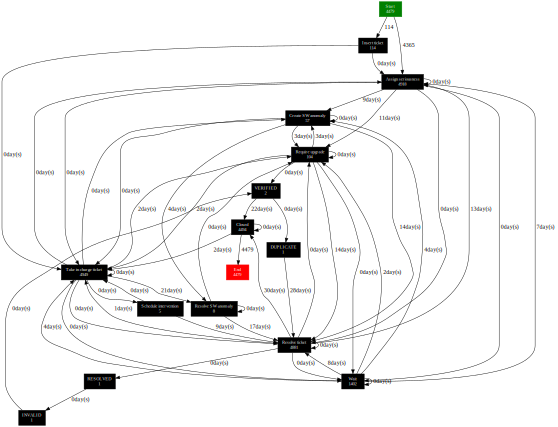

In [58]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

# max_node = 5
# max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Count'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Count'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, count = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in pro_det_timing.iterrows():
    g.node(row[activity],label=row[activity] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity]]['Count'].sum()))
    g.node(row[activity+'_2'],label=row[activity+'_2'] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity+'_2']]['Count'].sum()))

for index, row in pro_det_timing.iterrows():
    startevent, endevent, duration, count = [str(i) for i in row]
    g.edge(str(row[activity]), str(row[activity+'_2']), label= "  " + duration+"day(s)")
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(gra_coun[gra_coun[activity] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Count'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, count = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

### Using customers as the case IDs

I decided to take an alternate view of the process. Rather than using the Case ID as the unique identifier, I decided to use the Customer as the unique identifier. This gave a different perspective on the process. This will enable me to see if customers requests are really resolved or if the customer reopens the case over again, leading to a reduced customer satisfaction because the customer has to explain the problem again.

A possible metric here to be used is the "First Call Resolution Rate". This is a typical performance metric for call centres, which measures the number of times a customer problem cound be solved with the first call.

In [59]:
start_act = start_activities(df_final, customer, activity)
start_act

,Start,First Activity,Count
0,Start,Assign seriousness,381
1,Start,Insert ticket,8
2,Start,RESOLVED,1
3,Start,Take in charge ticket,1
4,Start,VERIFIED,1


In [60]:
end_act = end_activities(df_final, customer, activity)
end_act

,End,Last Activity,Count
0,End,Closed,390
1,End,DUPLICATE,1
2,End,VERIFIED,1


In [61]:
pro_det = process_details(df_final, customer, timestamp, activity)
pro_det

,Activity,Activity_2,Count
0,Assign seriousness,Take in charge ticket,4141
1,Take in charge ticket,Take in charge ticket,95
2,Take in charge ticket,Resolve ticket,3508
3,Resolve ticket,Closed,4479
4,Take in charge ticket,Require upgrade,68
5,Require upgrade,Resolve ticket,76
6,Assign seriousness,Assign seriousness,438
7,Take in charge ticket,Wait,1221
8,Wait,Resolve ticket,744
9,Insert ticket,Assign seriousness,111


In [62]:
gra_coun = graph_count(df_final, activity)
gra_coun

,Activity,Count
0,Take in charge ticket,4949
1,Assign seriousness,4918
2,Resolve ticket,4881
3,Closed,4494
4,Wait,1402
5,Insert ticket,114
6,Require upgrade,104
7,Create SW anomaly,57
8,Resolve SW anomaly,8
9,Schedule intervention,5


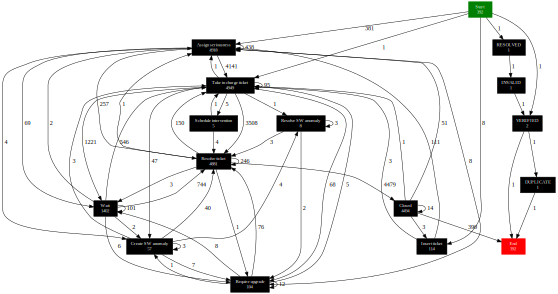

In [63]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

# max_node = 5
# max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Count'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Count'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, count = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in pro_det.iterrows():
    g.node(row[activity],label=row[activity] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity]]['Count'].sum()))
    g.node(row[activity+'_2'],label=row[activity+'_2'] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity+'_2']]['Count'].sum()))

for index, row in pro_det.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    g.edge(str(row[activity]), str(row[activity+'_2']), label= "  " + count)
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(gra_coun[gra_coun[activity] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Count'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, count = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

In [64]:
variants = variant_analysis(df_final, customer, activity)
variants

Count,Variants,Trace,No of occurance
0,1,"Assign seriousness,Take in charge ticket,Resol...",37
1,2,"Assign seriousness,Take in charge ticket,Wait,...",14
2,3,"Assign seriousness,Take in charge ticket,Resol...",9
3,4,"Assign seriousness,Take in charge ticket,Wait,...",7
4,5,"Assign seriousness,Take in charge ticket,Wait,...",5
...,...,...,...
304,305,"Assign seriousness,Take in charge ticket,Resol...",1
305,306,"Assign seriousness,Take in charge ticket,Resol...",1
306,307,"Assign seriousness,Take in charge ticket,Resol...",1
307,308,"Assign seriousness,Take in charge ticket,Resol...",1


In [65]:
list(variants['Trace'][0:5])

['Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed',
 'Assign seriousness,Take in charge ticket,Resolve ticket,Closed,Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
 'Assign seriousness,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed',
 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed,Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed']

In [66]:
distinct_df_customer = variant_analysis_df(df_final, customer, activity)
distinct_df_customer.columns = ['Customer_Variant','Customer_Trace','Customer_occurrence','customer']
distinct_df_customer

,Customer_Variant,Customer_Trace,Customer_occurrence,customer
0,1,"Assign seriousness,Take in charge ticket,Resol...",37,Value 129
1,1,"Assign seriousness,Take in charge ticket,Resol...",37,Value 141
2,1,"Assign seriousness,Take in charge ticket,Resol...",37,Value 154
3,1,"Assign seriousness,Take in charge ticket,Resol...",37,Value 228
4,1,"Assign seriousness,Take in charge ticket,Resol...",37,Value 235
...,...,...,...,...
387,305,"Assign seriousness,Take in charge ticket,Resol...",1,Value 78
388,306,"Assign seriousness,Take in charge ticket,Resol...",1,Value 2
389,307,"Assign seriousness,Take in charge ticket,Resol...",1,Value 135
390,308,"Assign seriousness,Take in charge ticket,Resol...",1,Value 43


In [67]:
distinct_df = distinct_df.merge(distinct_df_customer, on='customer')
distinct_df

,Variants,Trace,No of occurance,Case ID,Case_Duration_days,Activity,Resource,Complete Timestamp,Variant,Variant index,...,support_section,workgroup,Duration,Event_ID,Last Activity,First Activity,EndDate,Customer_Variant,Customer_Trace,Customer_occurrence
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 10,51,Assign seriousness,Value 2,2010-02-10 08:50:20,Variant 1,1,...,Value 2,Value 3,0.0,1,Closed,Assign seriousness,2010-04-03 07:47:38,248,"Assign seriousness,Take in charge ticket,Resol...",1
1,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1018,50,Assign seriousness,Value 14,2010-09-16 09:03:22,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-11-05 09:24:51,248,"Assign seriousness,Take in charge ticket,Resol...",1
2,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1485,42,Assign seriousness,Value 2,2010-01-21 08:52:31,Variant 1,1,...,Value 3,Value 3,0.0,1,Closed,Assign seriousness,2010-03-04 10:05:28,248,"Assign seriousness,Take in charge ticket,Resol...",1
3,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 955,53,Assign seriousness,Value 1,2011-10-03 12:23:27,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2011-11-25 13:30:24,248,"Assign seriousness,Take in charge ticket,Resol...",1
4,20,"Assign seriousness,Take in charge ticket,Wait,...",17,Case 195,53,Assign seriousness,Value 9,2010-09-21 10:53:00,Variant 22,22,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-11-13 13:30:16,248,"Assign seriousness,Take in charge ticket,Resol...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,59,"Assign seriousness,Take in charge ticket,Wait,...",3,Case 3959,40,Assign seriousness,Value 8,2011-04-21 14:47:11,Variant 53,53,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2011-05-31 14:50:19,99,"Assign seriousness,Take in charge ticket,Wait,...",1
4475,66,"Assign seriousness,Require upgrade,Resolve tic...",2,Case 1735,33,Assign seriousness,Value 18,2013-11-28 17:07:59,Variant 89,89,...,Value 1,Value 2,0.0,1,Closed,Assign seriousness,2014-01-01 09:28:25,217,"Assign seriousness,Require upgrade,Resolve tic...",1
4476,171,"Assign seriousness,Take in charge ticket,Take ...",1,Case 4353,50,Assign seriousness,Value 1,2013-11-12 10:26:37,Variant 221,221,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2014-01-02 08:23:57,192,"Assign seriousness,Take in charge ticket,Resol...",1
4477,187,"Assign seriousness,Take in charge ticket,Resol...",1,Case 3121,39,Assign seriousness,Value 18,2013-11-05 11:26:09,Variant 192,192,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2013-12-14 14:02:25,192,"Assign seriousness,Take in charge ticket,Resol...",1


In [71]:
distinct_df[distinct_df['Customer_Variant'] == 3]

,Variants,Trace,No of occurance,Case ID,Case_Duration_days,Activity,Resource,Complete Timestamp,Variant,Variant index,...,support_section,workgroup,Duration,Event_ID,Last Activity,First Activity,EndDate,Customer_Variant,Customer_Trace,Customer_occurrence
2148,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1127,31,Assign seriousness,Value 4,2012-01-18 09:39:21,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2012-02-18 09:40:18,3,"Assign seriousness,Take in charge ticket,Resol...",9
2149,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 3501,46,Assign seriousness,Value 1,2012-01-18 10:28:45,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2012-03-04 10:31:32,3,"Assign seriousness,Take in charge ticket,Resol...",9
2225,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1137,46,Assign seriousness,Value 13,2012-06-18 10:44:18,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2012-08-03 10:50:34,3,"Assign seriousness,Take in charge ticket,Resol...",9
2226,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 3259,30,Assign seriousness,Value 1,2012-02-29 10:44:38,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2012-03-31 09:50:56,3,"Assign seriousness,Take in charge ticket,Resol...",9
2671,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1220,49,Assign seriousness,Value 9,2010-10-21 12:42:29,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-12-09 13:50:32,3,"Assign seriousness,Take in charge ticket,Resol...",9
2672,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 2922,33,Assign seriousness,Value 2,2010-09-02 14:25:24,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-10-05 14:30:41,3,"Assign seriousness,Take in charge ticket,Resol...",9
2875,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 1277,31,Assign seriousness,Value 2,2010-03-29 13:48:03,Variant 1,1,...,Value 3,Value 3,0.0,1,Closed,Assign seriousness,2010-04-29 13:50:26,3,"Assign seriousness,Take in charge ticket,Resol...",9
2876,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 2006,43,Assign seriousness,Value 2,2010-02-24 16:03:18,Variant 1,1,...,Value 3,Value 1,0.0,1,Closed,Assign seriousness,2010-04-09 15:11:23,3,"Assign seriousness,Take in charge ticket,Resol...",9
3966,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 2299,43,Assign seriousness,Value 9,2010-07-08 10:47:06,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2010-08-20 12:41:07,3,"Assign seriousness,Take in charge ticket,Resol...",9
3967,1,"Assign seriousness,Take in charge ticket,Resol...",2366,Case 4362,31,Assign seriousness,Value 1,2011-10-05 15:11:55,Variant 1,1,...,Value 1,Value 1,0.0,1,Closed,Assign seriousness,2011-11-05 16:20:18,3,"Assign seriousness,Take in charge ticket,Resol...",9


In [68]:
# distinct_df.to_csv('Distinct_log.csv', index=False)

In [84]:
# Recurring Issues

# a. Recurrence Rate
# We'll determine the percentage of cases where a customer had to reach out more than once for the same product.
recurring_cases = df_final.groupby(['customer', 'product'])['Case ID'].nunique()
cases_with_recurrence = recurring_cases[recurring_cases > 1]
total_cases = df_final['Case ID'].nunique()
recurrence_rate = (len(cases_with_recurrence) / total_cases) * 100

recurrence_rate

11.966956910024559

In [96]:
#First Call Resolution Rate
fcr_rate = 100-recurrence_rate
fcr_rate

88.03304308997544